C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_45008\310366007.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered, x='메뉴명', y='매출수량', hue='요일유형', ci=None)


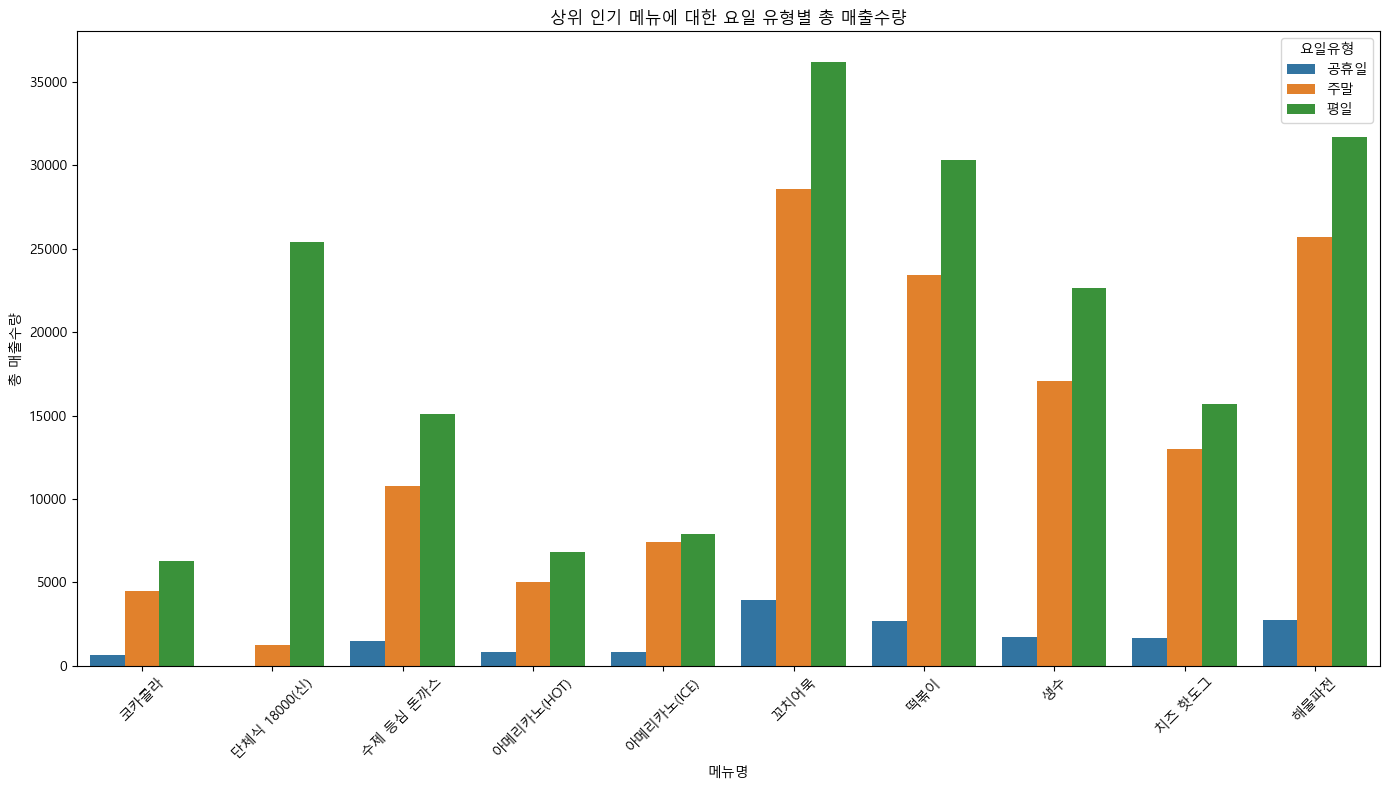

In [1]:
# 📦 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 데이터 불러오기
file_path = r"C:\Users\owner\Desktop\LG Aimers\open\train\processed_with_weekday_holiday.csv"
df = pd.read_csv(file_path, parse_dates=["영업일자"])

# ✅ 한글 폰트 설정 (Windows 전용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# ✅ 이상치 보정 (음수 제거)
df['매출수량'] = df['매출수량'].clip(lower=0)

# ✅ 요일유형 파생변수 생성: 공휴일 / 주말 / 평일
def classify_day(row):
    if row['공휴일여부'] == 1:
        return '공휴일'
    elif row['요일'] in ['토', '일']:
        return '주말'
    else:
        return '평일'

df['요일유형'] = df.apply(classify_day, axis=1)

# ✅ 그룹화: 메뉴명 + 영업장명 + 요일유형
grouped = df.groupby(['영업장명', '메뉴명', '요일유형'])['매출수량'].sum().reset_index()

# ✅ 상위 N개 메뉴 선택 (시각화 가독성을 위해)
top_menus = (
    df.groupby('메뉴명')['매출수량'].sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

filtered = grouped[grouped['메뉴명'].isin(top_menus)]

# ✅ 시각화: 메뉴 × 영업장 × 요일유형 조합별 평균 매출
plt.figure(figsize=(14, 8))
sns.barplot(data=filtered, x='메뉴명', y='매출수량', hue='요일유형', ci=None)
plt.title('상위 인기 메뉴에 대한 요일 유형별 총 매출수량')
plt.xlabel('메뉴명')
plt.ylabel('총 매출수량')
plt.legend(title='요일유형')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
